# Laporan Praktikum: Association Rule

## Identitas Mahasiswa
Nama: Wayan Raditya Putra  
NRP: 5054241029  
Kelas : N (RKA)
Mata Kuliah: Data Mining  
Topik: Association Rule (Apriori dan FP-Growth)

## Tujuan Praktikum
1. Memahami konsep Association Rule untuk menemukan hubungan antar item dalam data transaksi.
2. Menerapkan algoritma Apriori dan FP-Growth untuk mengekstraksi aturan asosiasi.
3. Mengevaluasi aturan berdasarkan metrik Support, Confidence, dan Lift.
4. Menarik kesimpulan dari pola pembelian yang ditemukan.


## Import Library dan Load Dataset

Langkah pertama yaitu mengimpor library yang dibutuhkan dan memuat dataset transaksi ritel Jawa Tengah.  
Dataset berisi catatan transaksi yang terdiri dari beberapa atribut seperti nomor invoice, nama produk, harga, pelanggan, dan lokasi cabang.  

Pada tahap ini, digunakan library pandas untuk membaca file CSV dan menampilkan beberapa baris pertama dari dataset.  
Langkah ini bertujuan untuk memahami struktur awal data dan memastikan file telah berhasil dimuat.


In [1]:
# === Import Library & Load Dataset ===
import pandas as pd

# Load dataset
df = pd.read_csv('transaksi_ritel_jateng.csv')

# Tampilkan 5 data pertama
df.head()


,InvoiceNo,InvoiceDate,BRANCH_SPLR,BRANCHNAME_SPLR,warehouseProductsID,BARCODEID,StockCode,PRODUCT,PRODUCT_CATEGORY,Quantity,...,UnitPriceRupiah,oldCUSTID,CustomerID,CUSTNAME,ADDRESS,KOTA,CHANNELID_SPLR,CHANNELNAME_SPLR,SUBDISTID,SUBDIST_NAME
0,536367,2020-12-01 08:34:00,19,YOGYAKARTA,A2375,9555021502350,84969,A LICAFE 100G,MINUMAN,6,...,60775.0,1922038,13047.0,IMAM,NEPAK BULUREJO (DPN SMKN 1),MAGELANG,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
1,536367,2020-12-01 08:34:00,19,YOGYAKARTA,A2568,8992761111212,22622,A&W SARSAPARILA 330ML,MINUMAN,2,...,142285.0,1922807,13047.0,A&W MART,JL RAYA KANDANGAN JLN.,TEMANGGUNG,32,Toko Kelontong,190105,PT. KTRI DISTRIBUSI
2,536368,2020-12-01 08:34:00,6,SEMARANG,A2416,8850305310340,22960,ABAKUS PERMEN 30G KTK BLT,MAKANAN KALENG,6,...,60775.0,1630992,13047.0,ANDALAN (MOTORIS),JL. RAYA TUNTANG - MBERAN,SALATIGA,32,Toko Kelontong,60315,PT. KELUARGA SEJAHTRA
3,536368,2020-12-01 08:34:00,6,SEMARANG,A2432,8850305310258,22913,ABAKUS PERMEN BONEKA,MINUMAN,3,...,70785.0,1631972,13047.0,AMBARWATI (MOTORIS),AMBARAWA,SEMARANG,32,Toko Kelontong,60315,PT. KELUARGA SEJAHTRA
4,536370,2020-12-01 08:45:00,36,PURWOKERTO,A2678,8992388121243,21724,ABC CUP SELERA PEDAS 65G TOMAT,MINUMAN,12,...,12155.0,3217503,12583.0,SALMA SLM0401,TANJUNG,BANYUMAS,32,Toko Kelontong,320302,CV. CITRA BERUSAHA


## Eksplorasi Awal Dataset

Pada tahap ini dilakukan eksplorasi awal terhadap dataset untuk mengetahui struktur dan karakteristik data.  
Perintah `df.info()` digunakan untuk menampilkan jumlah baris, kolom, tipe data pada setiap atribut, serta jumlah nilai yang tidak kosong.  

Langkah ini penting untuk memahami kondisi data sebelum dilakukan proses pembersihan dan pemilihan fitur yang relevan.  
Hasil eksplorasi menunjukkan bahwa dataset memiliki 138.644 baris dan 21 kolom dengan berbagai tipe data seperti numerik, float, dan object.


In [2]:
# === Eksplorasi Awal Dataset ===
# Cek struktur dataset
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138644 entries, 0 to 138643
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   InvoiceNo            138644 non-null  object 
 1   InvoiceDate          138644 non-null  object 
 2   BRANCH_SPLR          138644 non-null  int64  
 3   BRANCHNAME_SPLR      138644 non-null  object 
 4   warehouseProductsID  138644 non-null  object 
 5   BARCODEID            138644 non-null  int64  
 6   StockCode            138644 non-null  object 
 7   PRODUCT              138644 non-null  object 
 8   PRODUCT_CATEGORY     138644 non-null  object 
 9   Quantity             138644 non-null  int64  
 10  UnitPrice            138644 non-null  float64
 11  UnitPriceRupiah      138644 non-null  float64
 12  oldCUSTID            138644 non-null  int64  
 13  CustomerID           108336 non-null  float64
 14  CUSTNAME             138644 non-null  object 
 15  ADDRESS          

### Pemeriksaan Nilai Unik dan Data Kosong

Setelah mengetahui struktur dataset, dilakukan pengecekan jumlah nilai unik dan data kosong pada setiap kolom.  
Langkah ini bertujuan untuk memahami seberapa beragam data yang dimiliki serta mendeteksi kemungkinan adanya data yang hilang.

Perintah `df['InvoiceNo'].nunique()` digunakan untuk menghitung jumlah transaksi unik, sedangkan `df['PRODUCT'].nunique()` menghitung jumlah produk unik yang tercatat.  
Selain itu, `df.isnull().sum()` digunakan untuk melihat jumlah nilai kosong pada setiap kolom agar dapat ditangani pada tahap pembersihan data berikutnya.


In [3]:
# Cek data unik untuk tiap kolom
print("\nJumlah transaksi unik:", df['InvoiceNo'].nunique())
print("Jumlah produk unik:", df['PRODUCT'].nunique())

# Cek apakah ada data kosong
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())


Jumlah transaksi unik: 9266
Jumlah produk unik: 14093

Jumlah missing value per kolom:
InvoiceNo                  0
InvoiceDate                0
BRANCH_SPLR                0
BRANCHNAME_SPLR            0
warehouseProductsID        0
BARCODEID                  0
StockCode                  0
PRODUCT                    0
PRODUCT_CATEGORY           0
Quantity                   0
UnitPrice                  0
UnitPriceRupiah            0
oldCUSTID                  0
CustomerID             30308
CUSTNAME                   0
ADDRESS                    0
KOTA                    6672
CHANNELID_SPLR             0
CHANNELNAME_SPLR           0
SUBDISTID                  0
SUBDIST_NAME               0
dtype: int64


## Pembersihan Data

Pada tahap ini dilakukan proses pembersihan data untuk memastikan hanya atribut yang relevan digunakan dalam analisis Association Rule.  
Berdasarkan eksplorasi sebelumnya, hanya kolom `InvoiceNo` dan `PRODUCT` yang relevan karena berhubungan langsung dengan transaksi dan produk yang dibeli.  

Langkah-langkah yang dilakukan pada tahap ini adalah sebagai berikut:
1. Menghapus kolom yang tidak dibutuhkan.
2. Melakukan normalisasi teks pada kolom `PRODUCT` dengan mengubah huruf menjadi kecil dan menghapus spasi berlebih.
3. Menghapus duplikat data agar tidak ada pengulangan produk dalam transaksi yang sama.

Tahapan ini memastikan bahwa data bersih, terstandarisasi, dan siap digunakan untuk proses transformasi selanjutnya.


In [4]:
# Drop fitur tidak perlu
df = df[['InvoiceNo', 'PRODUCT']]

# Normalisasi teks produk
df['PRODUCT'] = df['PRODUCT'].str.lower().str.strip()

# Hapus duplikat identik
df.drop_duplicates(inplace=True)

# Cek hasil
print("Jumlah baris setelah dibersihkan:", len(df))
df.head(10)


Jumlah baris setelah dibersihkan: 134649


,InvoiceNo,PRODUCT
0,536367,a licafe 100g
1,536367,a&w sarsaparila 330ml
2,536368,abakus permen 30g ktk blt
3,536368,abakus permen boneka
4,536370,abc cup selera pedas 65g tomat
5,536370,abc kcp manis 18s
6,536370,abc kcp pedas 135ml
7,536371,abc kecap manis 600ml btl plastik
8,536373,abc kicap asin 133ml
9,536373,abc kicap asin 620ml


## Format Data Menjadi Transaksi per Invoice

Setelah data dibersihkan, langkah selanjutnya adalah mengubah bentuk data agar sesuai dengan format yang dibutuhkan oleh algoritma Association Rule.  
Setiap transaksi diwakili oleh satu nomor invoice yang berisi daftar produk yang dibeli dalam transaksi tersebut.  

Proses dilakukan dengan mengelompokkan data berdasarkan kolom `InvoiceNo` dan menggabungkan seluruh produk dalam setiap transaksi menjadi sebuah list.  
Hasil dari proses ini adalah dataset baru dengan dua kolom, yaitu:
- `InvoiceNo` sebagai identitas transaksi.
- `Items` sebagai daftar produk yang dibeli.

Langkah ini bertujuan agar setiap baris mewakili satu transaksi lengkap yang siap digunakan untuk proses encoding.


In [5]:
# === Format Data Menjadi Transaksi per Invoice ===

# Gabungkan semua produk berdasarkan nomor Invoice
basket = (df.groupby('InvoiceNo')['PRODUCT']
          .apply(list)            # gabungkan produk dalam 1 invoice jadi list
          .reset_index(name='Items'))  # ubah nama kolom jadi 'Items'

# Cek hasil awal
print("Jumlah transaksi unik:", len(basket))
basket.head(10)


Jumlah transaksi unik: 9266


,InvoiceNo,Items
0,536367,"[a licafe 100g, a&w sarsaparila 330ml]"
1,536368,"[abakus permen 30g ktk blt, abakus permen boneka]"
2,536370,"[abc cup selera pedas 65g tomat, abc kcp manis..."
3,536371,[abc kecap manis 600ml btl plastik]
4,536373,"[abc kicap asin 133ml, abc kicap asin 620ml, a..."
5,536374,[abc mie eat&go baso ayam 60g]
6,536375,"[abc mie remez 35g krim bawang, abc milk shake..."
7,536378,"[abc sambal extra redas 24sx9g, abc sambal mas..."
8,536381,"[abc saus tiram 195ml, abc saus tiram 30g, abc..."
9,536384,"[adidas deo spray women 150ml fruity, adidas d..."


## Encoding Data ke Format 0/1 untuk Apriori

Setelah data diformat menjadi daftar produk per transaksi, tahap selanjutnya adalah melakukan proses encoding agar data dapat dipahami oleh algoritma Apriori.  
Algoritma Apriori membutuhkan data dalam bentuk biner (0 dan 1), di mana:
- Nilai 1 menunjukkan bahwa produk tersebut dibeli dalam transaksi.
- Nilai 0 menunjukkan bahwa produk tersebut tidak dibeli.  

Proses encoding dilakukan menggunakan `TransactionEncoder` dari library `mlxtend`.  
Encoder ini mengubah setiap list produk dalam transaksi menjadi representasi one-hot encoded yang kemudian dikonversi ke dalam bentuk DataFrame.  

Langkah ini menghasilkan data dengan bentuk matriks, di mana setiap baris mewakili transaksi dan setiap kolom mewakili produk.


In [6]:
# ===Encoding Data ke Format 0/1 untuk Apriori ===

from mlxtend.preprocessing import TransactionEncoder

# Ubah list produk dalam setiap transaksi menjadi format one-hot encoded
te = TransactionEncoder()
te_ary = te.fit(basket['Items']).transform(basket['Items'])

# Konversi hasilnya ke DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Cek hasil awal
print("Ukuran data encoded:", df_encoded.shape)
df_encoded.head(10)


Ukuran data encoded: (9266, 14093)


,a licafe 100g,a&w sarsaparila 330ml,abakus permen 30g ktk blt,abakus permen boneka,abc brownies 30s,abc cup selera pedas 65g tomat,abc dent 130g,abc juice guava 1ltr,abc juice jambu 250ml,abc juice jambu premium gold 1l,...,zwitsal pwd 100g soft,zwitsal pwd 100g w.zinc,zwitsal pwd 300g soft,zwitsal pwd 500g fresh,zwitsal pwd 500g soft,zwitsal round pack,zwitsal shampoo 50ml,zwitsal shp 100ml classic,zwitsal shp 300ml aloe vera,zwitsal shp ref clean&r 250ml
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Menjalankan Algoritma Apriori

Tahap ini merupakan inti dari proses Association Rule Mining menggunakan algoritma Apriori.  
Algoritma Apriori digunakan untuk menemukan kombinasi produk yang sering muncul bersama dalam transaksi.  

Parameter yang digunakan adalah `min_support = 0.002`, yang berarti suatu kombinasi produk akan dianggap signifikan jika muncul pada minimal 0,2% dari total transaksi.  
Nilai ini disesuaikan dengan ukuran dataset agar jumlah kombinasi yang ditemukan tetap relevan dan tidak terlalu sedikit.

Hasil dari proses ini adalah daftar itemset yang sering muncul, disertai dengan nilai support yang menunjukkan seberapa sering kombinasi produk tersebut muncul dalam seluruh transaksi.


In [ ]:
# === Menjalankan Algoritma Apriori ===

from mlxtend.frequent_patterns import apriori

# Jalankan algoritma Apriori
# min_support = 0.01 berarti item harus muncul di minimal 1% transaksi
frequent_itemsets = apriori(df_encoded, min_support=0.002, use_colnames=True)

# Urutkan berdasarkan support tertinggi
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

print("Jumlah Frequent Itemsets ditemukan:", len(frequent_itemsets))
# Tampilkan 10 itemset paling sering muncul
print("Top 10 Frequent Itemsets:")
frequent_itemsets.head(10)


Jumlah Frequent Itemsets ditemukan: 1075
Top 10 Frequent Itemsets:


,support,itemsets
609,0.005504,(sikat wc)
650,0.004856,(soy master stroberi 320ml)
363,0.004749,(pigeon hot & sour mustard 140gr)
822,0.004425,(vidoran plus syrup 120ml)
333,0.004425,(pc deodorant ref 250ml)
793,0.004425,(v3 jam 450gr strawberry)
489,0.004317,(royco 10g asam)
448,0.004209,(real good 180ml sereal cho)
846,0.004101,(vivelle b.mist 75ml delice)
273,0.004101,(nota ncr b r2 ppl(g.m))


## Visualisasi Top 10 Itemsets dengan Support Tertinggi

Setelah mendapatkan kombinasi produk yang paling sering muncul, langkah berikutnya adalah melakukan visualisasi untuk mempermudah interpretasi hasil.  
Visualisasi dilakukan dengan menampilkan sepuluh kombinasi itemset teratas berdasarkan nilai support tertinggi.  

Grafik batang horizontal digunakan untuk menunjukkan tingkat kemunculan setiap kombinasi produk dalam transaksi.  
Semakin tinggi nilai support, semakin sering kombinasi produk tersebut muncul bersama dalam dataset.  

Visualisasi ini membantu mengidentifikasi produk-produk yang sering dibeli bersamaan dan menjadi dasar dalam pembentukan aturan asosiasi.


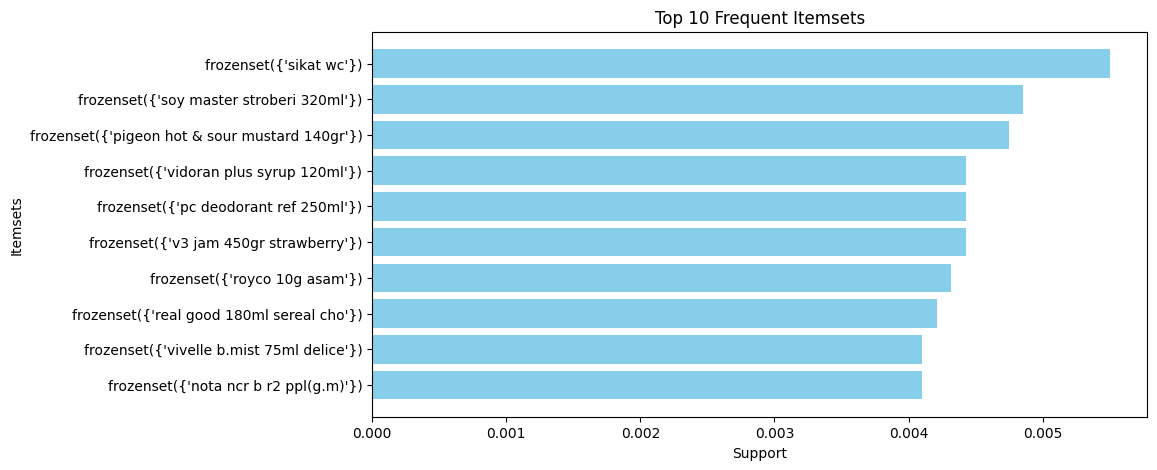

In [ ]:
# === Visualisasi Top 10 Itemsets dengan Support Tertinggi ===

import matplotlib.pyplot as plt

top_items = frequent_itemsets.head(10)
plt.figure(figsize=(10,5))
plt.barh(top_items['itemsets'].astype(str), top_items['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.gca().invert_yaxis()
plt.show()


## Membentuk Aturan Asosiasi

Setelah diperoleh kombinasi produk yang sering muncul, tahap selanjutnya adalah membentuk aturan asosiasi antar produk.  
Aturan asosiasi menunjukkan hubungan sebab-akibat dalam bentuk “jika produk A dibeli, maka kemungkinan produk B juga dibeli.”  

Proses ini dilakukan menggunakan fungsi `association_rules` dari library `mlxtend`, dengan parameter:
- `metric="confidence"` untuk menghitung tingkat kepercayaan hubungan antar produk.
- `min_threshold=0.5` untuk hanya menampilkan aturan dengan confidence minimal 50 persen.  

Hasil yang diperoleh berupa daftar aturan yang berisi informasi antecedent (produk pemicu), consequent (produk hasil), serta nilai support, confidence, dan lift.  
Nilai lift yang tinggi menunjukkan hubungan pembelian yang kuat antara produk-produk tersebut.


In [ ]:
# === Membentuk Aturan Asosiasi ===

from mlxtend.frequent_patterns import association_rules

# Buat aturan asosiasi dari frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Urutkan berdasarkan nilai lift tertinggi
rules = rules.sort_values(by='lift', ascending=False)

# Tampilkan 10 aturan teratas
print("Top 10 Aturan Asosiasi (berdasarkan Lift):")
rules.head(10)


Top 10 Aturan Asosiasi (berdasarkan Lift):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
334,(piatos chips 70g sambal tomat),"(pixy lipstick glam l205, piatos chips 70g abon)",0.002266,0.002051,0.002051,0.904762,441.238095,1.0,0.002046,10.478470,1.000000,0.904762,0.904566,0.952381
331,"(pixy lipstick glam l205, piatos chips 70g abon)",(piatos chips 70g sambal tomat),0.002051,0.002266,0.002051,1.000000,441.238095,1.0,0.002046,inf,0.999784,0.904762,1.000000,0.952381
351,"(vipro-g sachet 4,5gx12s papan)","(vipro-g sachet 4,5gx5s box)",0.002158,0.002158,0.002051,0.950000,440.135000,1.0,0.002046,19.956831,0.999886,0.904762,0.949892,0.950000
354,(bebelac 3 400g vanila),(bebelac 4 400g vanila),0.002158,0.002158,0.002051,0.950000,440.135000,1.0,0.002046,19.956831,0.999886,0.904762,0.949892,0.950000
353,(bebelac 4 400g vanila),(bebelac 3 400g vanila),0.002158,0.002158,0.002051,0.950000,440.135000,1.0,0.002046,19.956831,0.999886,0.904762,0.949892,0.950000
357,(bebelac 3 800g vanila),(bebelac 3 madu 200g),0.002158,0.002158,0.002051,0.950000,440.135000,1.0,0.002046,19.956831,0.999886,0.904762,0.949892,0.950000
348,(ws b wadah sendok no.3171),(wakul kiramas 2602 bulat (a.c)),0.002158,0.002158,0.002051,0.950000,440.135000,1.0,0.002046,19.956831,0.999886,0.904762,0.949892,0.950000
349,(wakul kiramas 2602 bulat (a.c)),(ws b wadah sendok no.3171),0.002158,0.002158,0.002051,0.950000,440.135000,1.0,0.002046,19.956831,0.999886,0.904762,0.949892,0.950000
358,(bebelac 3 madu 200g),(bebelac 3 800g vanila),0.002158,0.002158,0.002051,0.950000,440.135000,1.0,0.002046,19.956831,0.999886,0.904762,0.949892,0.950000
350,"(vipro-g sachet 4,5gx5s box)","(vipro-g sachet 4,5gx12s papan)",0.002158,0.002158,0.002051,0.950000,440.135000,1.0,0.002046,19.956831,0.999886,0.904762,0.949892,0.950000


## Tiga Aturan Terbaik Berdasarkan Lift

Setelah seluruh aturan asosiasi terbentuk, tahap selanjutnya adalah memilih tiga aturan terbaik berdasarkan nilai lift tertinggi.  
Nilai lift digunakan untuk mengukur seberapa kuat hubungan antara produk yang dibeli bersama.  
Semakin tinggi nilai lift, semakin besar pengaruh pembelian produk antecedent terhadap kemungkinan pembelian produk consequent.  

Aturan-aturan dengan nilai lift tertinggi dianggap paling relevan karena menunjukkan hubungan positif yang signifikan antar produk.  
Hasil dari tahap ini akan digunakan untuk proses interpretasi dan analisis pola pembelian.


In [ ]:
# === Tiga Aturan Terbaik Berdasarkan Lift ===

top_rules = rules.nlargest(3, 'lift')
top_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
334,(piatos chips 70g sambal tomat),"(pixy lipstick glam l205, piatos chips 70g abon)",0.002051,0.904762,441.238095
331,"(pixy lipstick glam l205, piatos chips 70g abon)",(piatos chips 70g sambal tomat),0.002051,1.000000,441.238095
351,"(vipro-g sachet 4,5gx12s papan)","(vipro-g sachet 4,5gx5s box)",0.002051,0.950000,440.135000


## Interpretasi 3 Aturan Terbaik

Pada tahap ini dilakukan interpretasi terhadap tiga aturan dengan nilai lift tertinggi yang telah diperoleh sebelumnya.  
Setiap aturan dianalisis untuk memahami hubungan antara produk antecedent (produk pemicu) dan consequent (produk yang mengikuti).  

Nilai support menunjukkan seberapa sering kombinasi produk tersebut muncul dalam dataset.  
Nilai confidence menggambarkan probabilitas pembelian produk consequent setelah produk antecedent dibeli.  
Nilai lift menunjukkan kekuatan hubungan antara kedua produk, di mana:
- Lift lebih dari 1 menandakan hubungan positif atau adanya kecenderungan dibeli bersama.
- Lift sama dengan 1 menunjukkan hubungan netral.
- Lift kurang dari 1 menandakan hubungan yang lemah atau negatif.  

Hasil interpretasi ini memberikan wawasan mengenai pola pembelian yang terjadi dan dapat digunakan sebagai dasar strategi pemasaran seperti rekomendasi produk atau bundling.


In [ ]:
# === Interpretasi 3 Aturan Terbaik ===

for i, row in top_rules.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    print(f"Aturan {i+1}: Jika seseorang membeli [{antecedent}], maka kemungkinan juga membeli [{consequent}].")
    print(f" - Support    : {row['support']:.3f}")
    print(f" - Confidence : {row['confidence']:.3f}")
    print(f" - Lift       : {row['lift']:.3f}")
    
    if row['lift'] > 1:
        print("   → Interpretasi: Hubungan positif. Pembelian produk antecedent meningkatkan kemungkinan pembelian consequent.\n")
    else:
        print("   → Interpretasi: Hubungan lemah atau tidak signifikan.\n")


Aturan 335: Jika seseorang membeli [piatos chips 70g sambal tomat], maka kemungkinan juga membeli [pixy lipstick glam l205, piatos chips 70g abon].
 - Support    : 0.002
 - Confidence : 0.905
 - Lift       : 441.238
   → Interpretasi: Hubungan positif. Pembelian produk antecedent meningkatkan kemungkinan pembelian consequent.

Aturan 332: Jika seseorang membeli [pixy lipstick glam l205, piatos chips 70g abon], maka kemungkinan juga membeli [piatos chips 70g sambal tomat].
 - Support    : 0.002
 - Confidence : 1.000
 - Lift       : 441.238
   → Interpretasi: Hubungan positif. Pembelian produk antecedent meningkatkan kemungkinan pembelian consequent.

Aturan 352: Jika seseorang membeli [vipro-g sachet 4,5gx12s papan], maka kemungkinan juga membeli [vipro-g sachet 4,5gx5s box].
 - Support    : 0.002
 - Confidence : 0.950
 - Lift       : 440.135
   → Interpretasi: Hubungan positif. Pembelian produk antecedent meningkatkan kemungkinan pembelian consequent.



## Menjalankan Algoritma FP-Growth

Selain algoritma Apriori, digunakan juga algoritma FP-Growth untuk menemukan kombinasi produk yang sering muncul bersama.  
FP-Growth memiliki prinsip kerja yang sama dengan Apriori, namun lebih efisien karena tidak perlu membangkitkan semua kombinasi item secara eksplisit.  

Algoritma ini menggunakan struktur data yang disebut FP-Tree (Frequent Pattern Tree) untuk mempercepat proses pencarian pola.  
Parameter yang digunakan adalah `min_support = 0.002`, agar hasil yang diperoleh tetap sebanding dengan proses Apriori sebelumnya.  

Hasil dari proses ini berupa daftar kombinasi itemset yang sering muncul, dilengkapi dengan nilai support untuk setiap kombinasi.


In [ ]:
# === Menjalankan Algoritma FP-Growth ===

from mlxtend.frequent_patterns import fpgrowth

# Jalankan algoritma FP-Growth dengan min_support yang sama (misal 0.002)
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.002, use_colnames=True)

# Urutkan berdasarkan support tertinggi
frequent_itemsets_fp = frequent_itemsets_fp.sort_values(by='support', ascending=False)

print("Jumlah Frequent Itemsets ditemukan:", len(frequent_itemsets_fp))
frequent_itemsets_fp.head(10)


Jumlah Frequent Itemsets ditemukan: 1075


,support,itemsets
473,0.005504,(sikat wc)
498,0.004856,(soy master stroberi 320ml)
323,0.004749,(pigeon hot & sour mustard 140gr)
594,0.004425,(v3 jam 450gr strawberry)
611,0.004425,(vidoran plus syrup 120ml)
829,0.004425,(pc deodorant ref 250ml)
402,0.004317,(royco 10g asam)
386,0.004209,(real good 180ml sereal cho)
41,0.004101,(busa cuci piring 5s)
264,0.004101,(nota ncr b r2 ppl(g.m))


## Visualisasi Top 10 Itemsets dengan Support Tertinggi (FP-Growth)

Untuk mempermudah interpretasi hasil dari algoritma FP-Growth, dilakukan visualisasi terhadap sepuluh kombinasi itemset dengan nilai support tertinggi.  
Visualisasi ini menggunakan grafik batang horizontal untuk menunjukkan tingkat kemunculan setiap kombinasi produk dalam transaksi.  

Nilai support yang lebih tinggi menunjukkan bahwa kombinasi produk tersebut lebih sering muncul bersama dalam dataset.  
Dengan visualisasi ini, dapat diketahui produk-produk mana yang paling sering dibeli bersamaan oleh pelanggan.


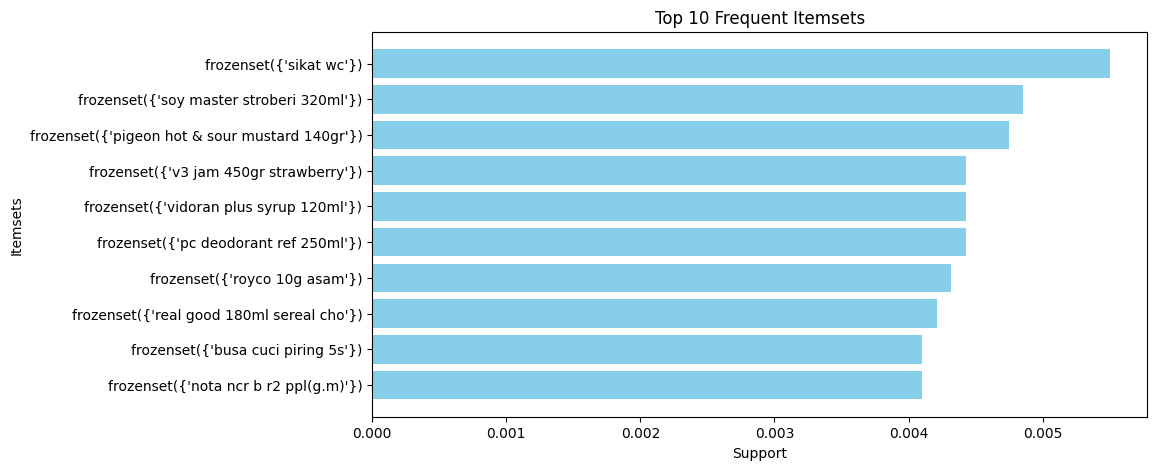

In [ ]:
# === Visualisasi Top 10 Itemsets dengan Support Tertinggi ===

import matplotlib.pyplot as plt

top_items = frequent_itemsets_fp.head(10)
plt.figure(figsize=(10,5))
plt.barh(top_items['itemsets'].astype(str), top_items['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.gca().invert_yaxis()
plt.show()


## Membangun Aturan Asosiasi dari FP-Growth

Setelah diperoleh kombinasi produk yang sering muncul dengan algoritma FP-Growth, tahap berikutnya adalah membentuk aturan asosiasi antar produk.  
Aturan asosiasi ini menunjukkan hubungan pembelian antar produk berdasarkan metrik support, confidence, dan lift.  

Fungsi `association_rules` digunakan dengan parameter:
- `metric="confidence"` untuk menghitung tingkat kepercayaan hubungan antar produk.
- `min_threshold=0.5` agar hanya aturan dengan tingkat kepercayaan minimal 50 persen yang ditampilkan.  

Hasil dari tahap ini berupa daftar aturan pembelian yang diurutkan berdasarkan nilai lift tertinggi.  
Aturan dengan nilai lift yang lebih besar dari satu menunjukkan hubungan positif antar produk, yang berarti produk-produk tersebut cenderung dibeli bersamaan.


In [ ]:
# === Membangun Aturan Asosiasi dari FP-Growth ===

from mlxtend.frequent_patterns import association_rules

# Bentuk aturan asosiasi dari hasil FP-Growth
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.5)

# Urutkan berdasarkan nilai lift tertinggi
rules_fp = rules_fp.sort_values(by='lift', ascending=False)

# Tampilkan 10 aturan terbaik
print("Top 10 Aturan FP-Growth (berdasarkan Lift):")
rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)


Top 10 Aturan FP-Growth (berdasarkan Lift):


,antecedents,consequents,support,confidence,lift
318,(piatos chips 70g sambal tomat),"(pixy lipstick glam l205, piatos chips 70g abon)",0.002051,0.904762,441.238095
315,"(pixy lipstick glam l205, piatos chips 70g abon)",(piatos chips 70g sambal tomat),0.002051,1.000000,441.238095
381,(bebelac 3 madu 200g),(bebelac 3 800g vanila),0.002051,0.950000,440.135000
380,(bebelac 3 800g vanila),(bebelac 3 madu 200g),0.002051,0.950000,440.135000
397,"(vipro-g sachet 4,5gx12s papan)","(vipro-g sachet 4,5gx5s box)",0.002051,0.950000,440.135000
396,"(vipro-g sachet 4,5gx5s box)","(vipro-g sachet 4,5gx12s papan)",0.002051,0.950000,440.135000
399,(wakul kiramas 2602 bulat (a.c)),(ws b wadah sendok no.3171),0.002051,0.950000,440.135000
398,(ws b wadah sendok no.3171),(wakul kiramas 2602 bulat (a.c)),0.002051,0.950000,440.135000
379,(bebelac 3 400g vanila),(bebelac 4 400g vanila),0.002051,0.950000,440.135000
378,(bebelac 4 400g vanila),(bebelac 3 400g vanila),0.002051,0.950000,440.135000


## Tiga Aturan Terbaik FP-Growth dan Interpretasi

Tahap ini menampilkan tiga aturan terbaik yang dihasilkan oleh algoritma FP-Growth berdasarkan nilai lift tertinggi.  
Setiap aturan menjelaskan hubungan antara produk antecedent (produk pemicu) dan consequent (produk hasil), serta menampilkan nilai support, confidence, dan lift.  

Nilai support menunjukkan seberapa sering kombinasi produk tersebut muncul dalam seluruh transaksi.  
Nilai confidence menggambarkan seberapa besar kemungkinan produk consequent dibeli setelah produk antecedent dibeli.  
Nilai lift menunjukkan kekuatan hubungan antar produk, di mana lift yang lebih besar dari satu menandakan adanya hubungan positif antar produk.  

Interpretasi hasil ini memberikan wawasan mengenai pola pembelian pelanggan yang dapat digunakan untuk strategi pemasaran seperti rekomendasi produk, promosi silang, atau paket bundling.


In [ ]:
# === Tiga Aturan Terbaik FP-Growth + Interpretasi ===

top_rules_fp = rules_fp.nlargest(3, 'lift')

for i, row in top_rules_fp.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    print(f"Aturan {i+1}: Jika seseorang membeli [{antecedent}], maka kemungkinan juga membeli [{consequent}].")
    print(f" - Support    : {row['support']:.3f}")
    print(f" - Confidence : {row['confidence']:.3f}")
    print(f" - Lift       : {row['lift']:.3f}")
    
    if row['lift'] > 1:
        print("   → Interpretasi: Hubungan positif. Produk antecedent meningkatkan peluang pembelian consequent.\n")
    else:
        print("   → Interpretasi: Hubungan lemah atau tidak signifikan.\n")


Aturan 319: Jika seseorang membeli [piatos chips 70g sambal tomat], maka kemungkinan juga membeli [pixy lipstick glam l205, piatos chips 70g abon].
 - Support    : 0.002
 - Confidence : 0.905
 - Lift       : 441.238
   → Interpretasi: Hubungan positif. Produk antecedent meningkatkan peluang pembelian consequent.

Aturan 316: Jika seseorang membeli [pixy lipstick glam l205, piatos chips 70g abon], maka kemungkinan juga membeli [piatos chips 70g sambal tomat].
 - Support    : 0.002
 - Confidence : 1.000
 - Lift       : 441.238
   → Interpretasi: Hubungan positif. Produk antecedent meningkatkan peluang pembelian consequent.

Aturan 382: Jika seseorang membeli [bebelac 3 madu 200g], maka kemungkinan juga membeli [bebelac 3 800g vanila].
 - Support    : 0.002
 - Confidence : 0.950
 - Lift       : 440.135
   → Interpretasi: Hubungan positif. Produk antecedent meningkatkan peluang pembelian consequent.



## Penutup dan Kesimpulan

Hasil eksplorasi data menunjukkan bahwa dataset transaksi ritel Jawa Tengah memiliki 138.644 baris data dengan 21 atribut.  
Dari seluruh atribut, hanya kolom `InvoiceNo` dan `PRODUCT` yang relevan untuk analisis Association Rule.  
Setelah proses pembersihan data dan pengelompokan per transaksi, diperoleh 9.266 transaksi unik dengan lebih dari 14.000 jenis produk berbeda.  

Analisis dilakukan menggunakan dua algoritma, yaitu Apriori dan FP-Growth.  
Keduanya berhasil menemukan kombinasi produk yang sering muncul bersama serta menghasilkan aturan asosiasi yang menggambarkan hubungan antar produk.  
Nilai support, confidence, dan lift digunakan sebagai metrik evaluasi:
- Support menunjukkan seberapa sering kombinasi produk muncul dalam transaksi.
- Confidence menunjukkan tingkat kepercayaan bahwa produk tertentu dibeli setelah produk lain.
- Lift menunjukkan kekuatan hubungan antar produk, di mana nilai lebih dari satu menandakan hubungan positif.  

Dari hasil aturan asosiasi, ditemukan bahwa beberapa produk memiliki keterkaitan pembelian yang kuat, yang berarti pelanggan cenderung membeli produk-produk tersebut secara bersamaan.  
Aturan dengan nilai lift tertinggi dianggap paling signifikan karena menunjukkan pengaruh terbesar antara pembelian produk antecedent terhadap pembelian produk consequent.  

Secara keseluruhan, analisis ini menunjukkan bahwa metode Association Rule dapat digunakan untuk menemukan pola pembelian pelanggan dan memberikan dasar yang kuat bagi strategi bisnis.  
Temuan ini dapat dimanfaatkan dalam pengambilan keputusan seperti rekomendasi produk, pengaturan tata letak barang, promosi bundling, dan strategi pemasaran yang lebih efektif.
